<table align="center">
  <td align="center"><a target="_blank" 
  href="https://colab.research.google.com/github/pbogden/my_observable/blob/master/matplotlib_animations.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>



# matplotlib animations

First demo: An easy way to animate a matplotlib figure is to use the IPython display API to draw and clear a sequence of figures, but it's clunky.

Second demo: The matplotlib animation API is harder to set up.

* [matplotlib animation API](https://matplotlib.org/3.3.3/api/animation_api.html)
* IPython.display example: [6.S191 util.py](https://github.com/aamini/introtodeeplearning/blob/master/mitdeeplearning/util.py)

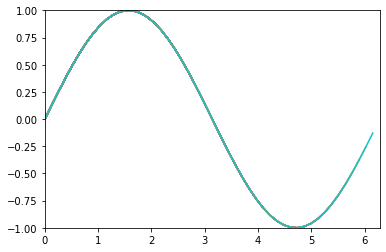

In [10]:
# Use the IPython.display API to draw/clear a sequence
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Create the data
N = 50
x = np.linspace(0, 2*np.pi, N)
y = np.sin(x)

# Initialize the plot (fixed axes)
fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])

# Plot a sequence of frames
for i, xi in enumerate(x):
  ax.plot(x[:i], y[:i])

  display.clear_output(wait=True)
  display.display(plt.gcf())

plt.close() # prevent duplicate of final plot

In [ ]:
# Demo the matplotlib.animation API
# To work in colab, you to convert the animation to HTML
import matplotlib.pyplot as plt
from matplotlib import animation, rc

# Initialize the plot
fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l = ax.plot([],[])  # return a list of Line2D


def animate(i):
    l.set_data(x[:i], y[:i])

rc('animation', html='jshtml') # This is necessary for colab
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(x))
plt.close()

ani

# This colab alternative uses matplotlib.display
# from IPython.display import HTML
# HTML(ani.to_jshtml())

In [2]:
l

In [ ]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

from matplotlib import rc

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 5  # how many seconds to simulate


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0, t_stop, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 1))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text


ani = animation.FuncAnimation(
    fig, animate, len(y), interval=dt*1000, blit=True)
plt.close()

rc('animation', html='jshtml')
ani

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# animated histogram

https://matplotlib.org/3.1.1/gallery/animation/animated_histogram.html

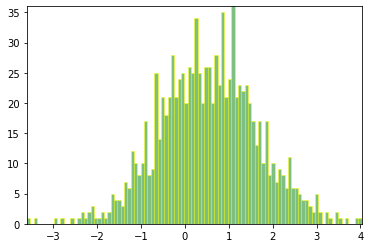

In [10]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)


nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom


patch = None


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

fig, ax = plt.subplots()
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

rc('animation', html='jshtml')
ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
#plt.show()

ani
